In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

In [ ]:
%matplotlib inline

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
pip install catBoost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 8.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
heart = pd.read_csv('/content/heart.csv')

In [ ]:
heart.shape

(1025, 14)

In [ ]:
heart.describe

<bound method NDFrame.describe of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
4         1   3     2       0  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[1025 rows x 14 columns]>

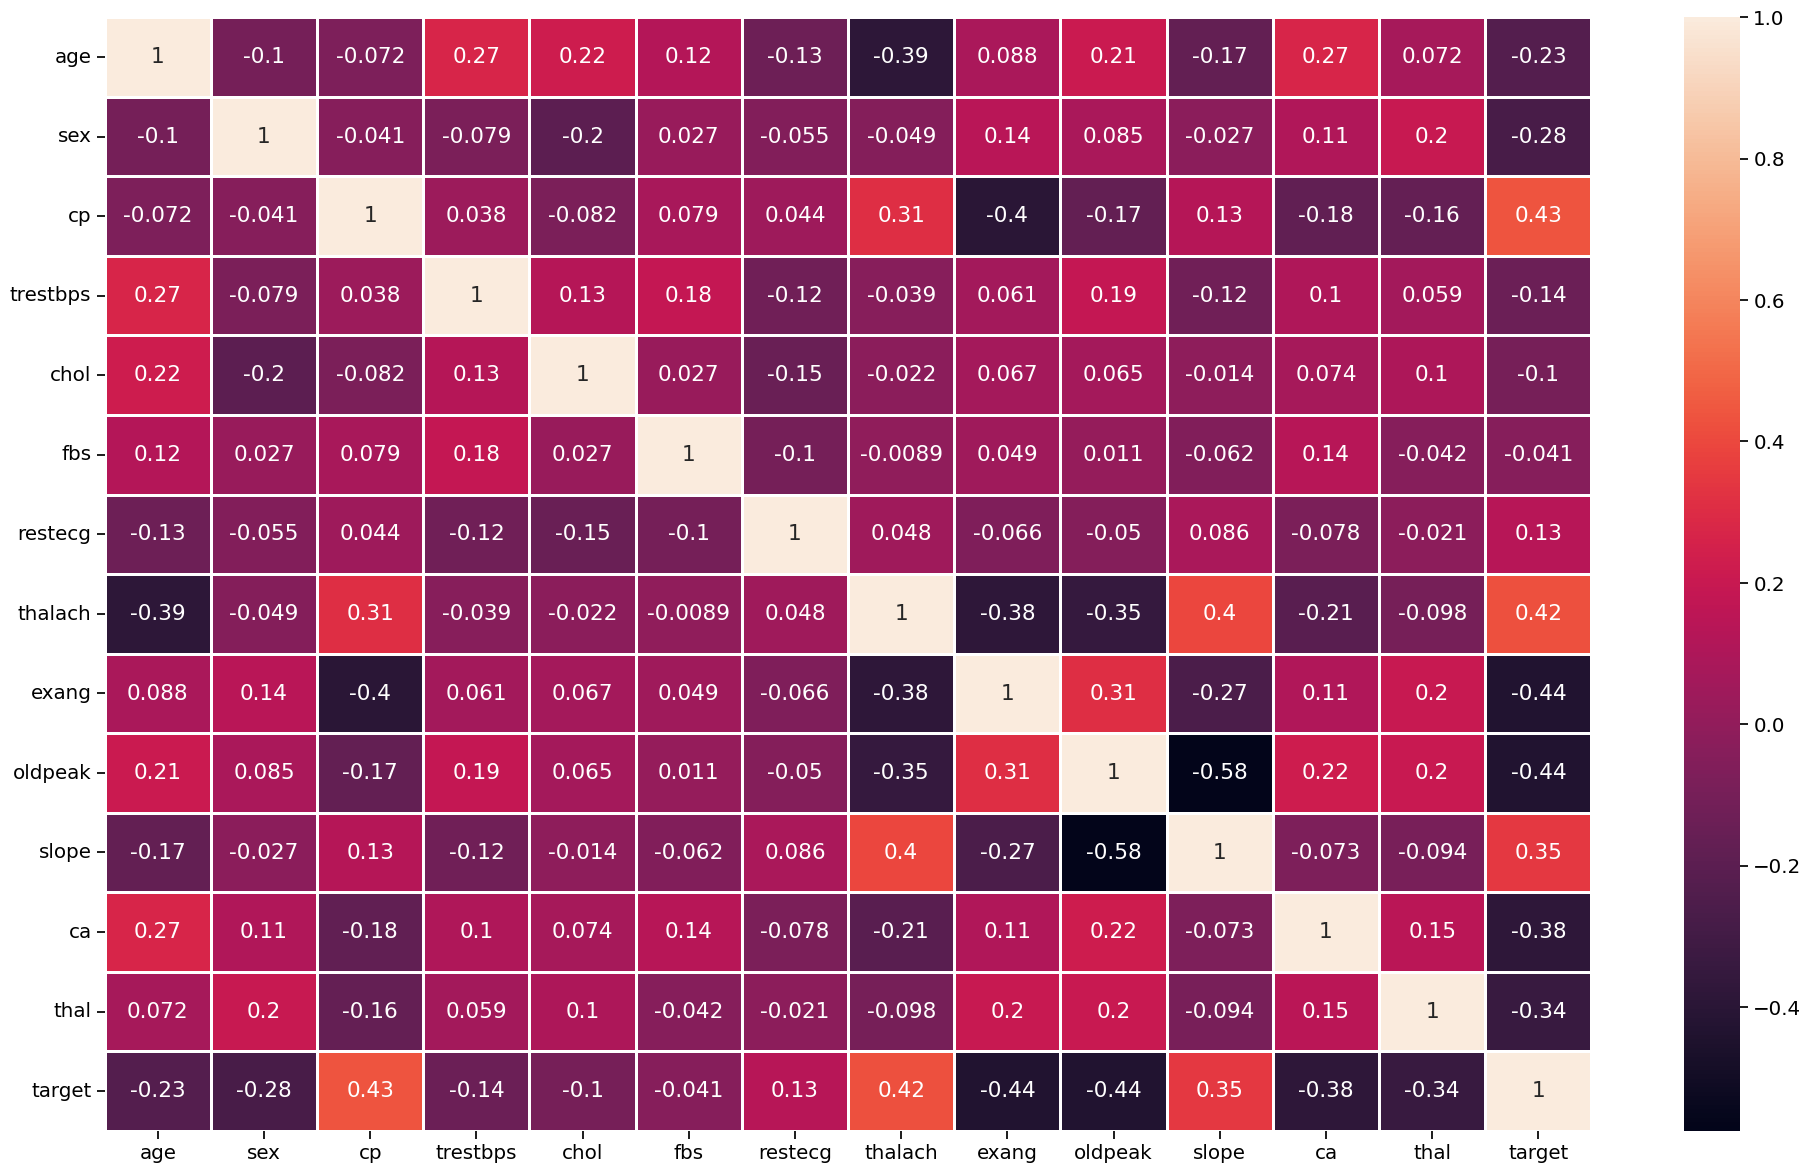

In [ ]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(heart.corr(),annot=True,linewidth =2)
plt.tight_layout()

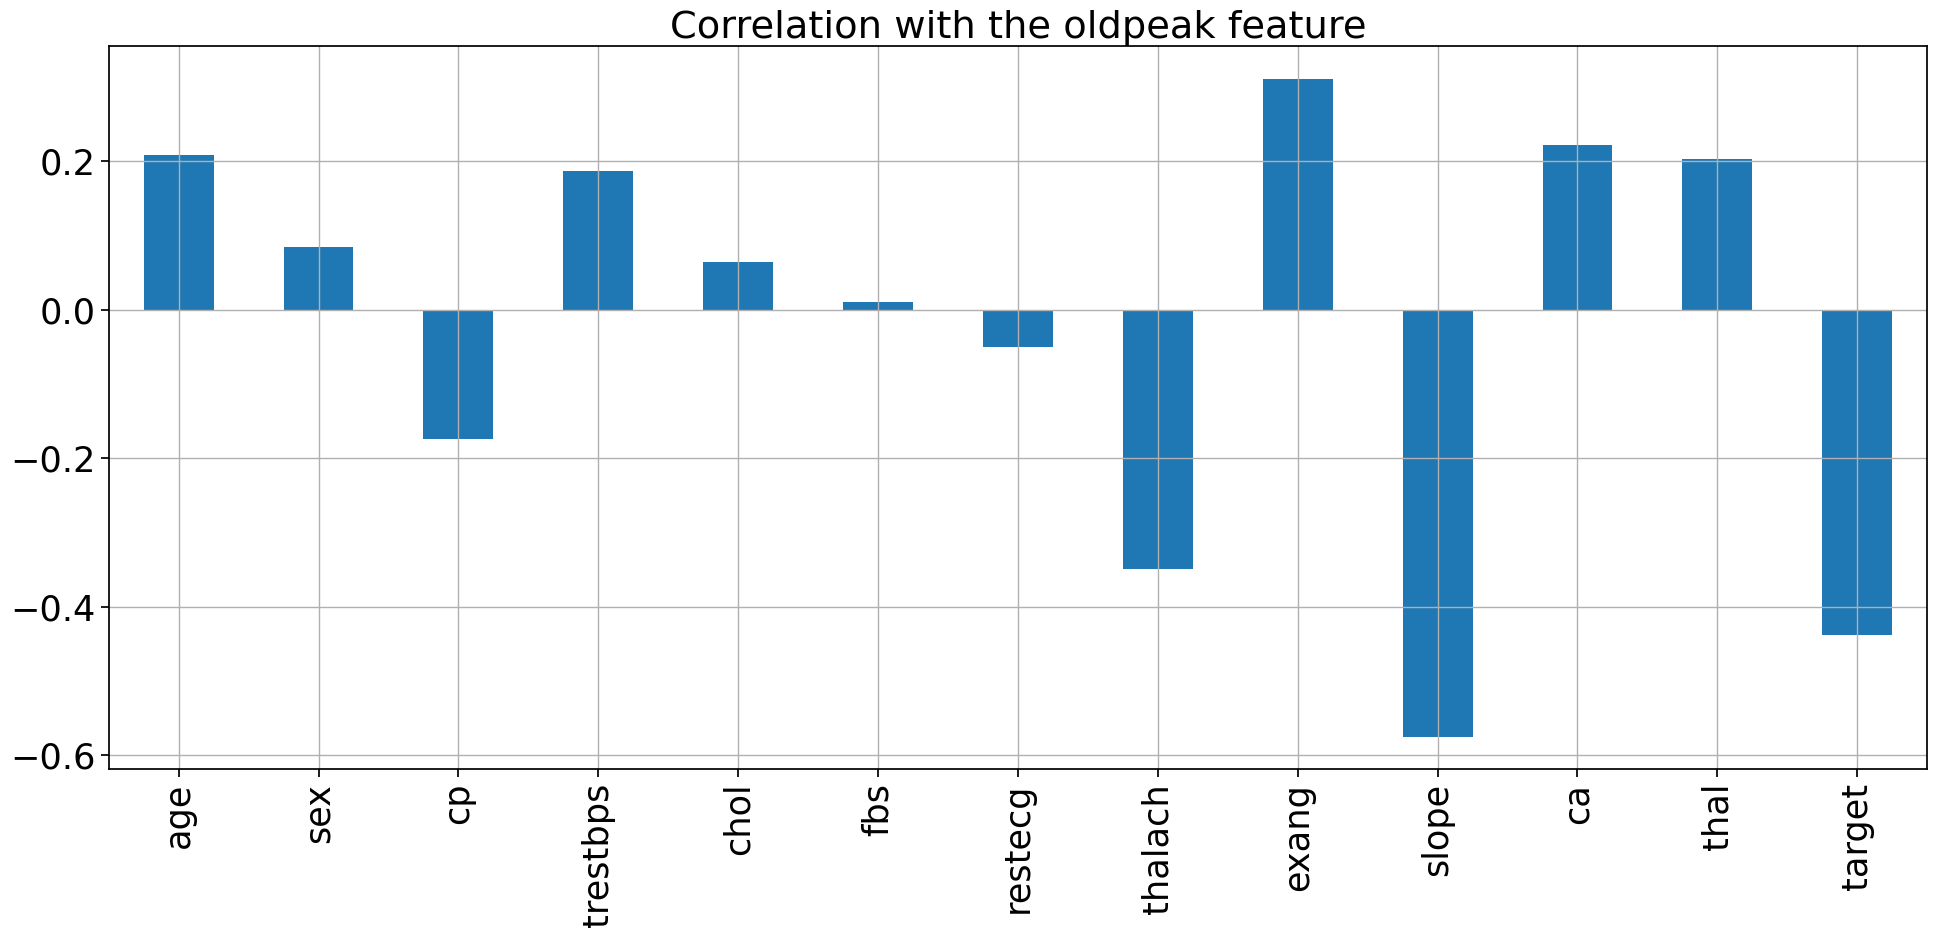

In [ ]:
sns.set_context('notebook',font_scale = 2.3)
heart.drop('oldpeak',axis=1).corrwith(heart.oldpeak).plot(kind='bar', grid=True, figsize=(20, 10), title="Correlation with the oldpeak feature")
plt.tight_layout()

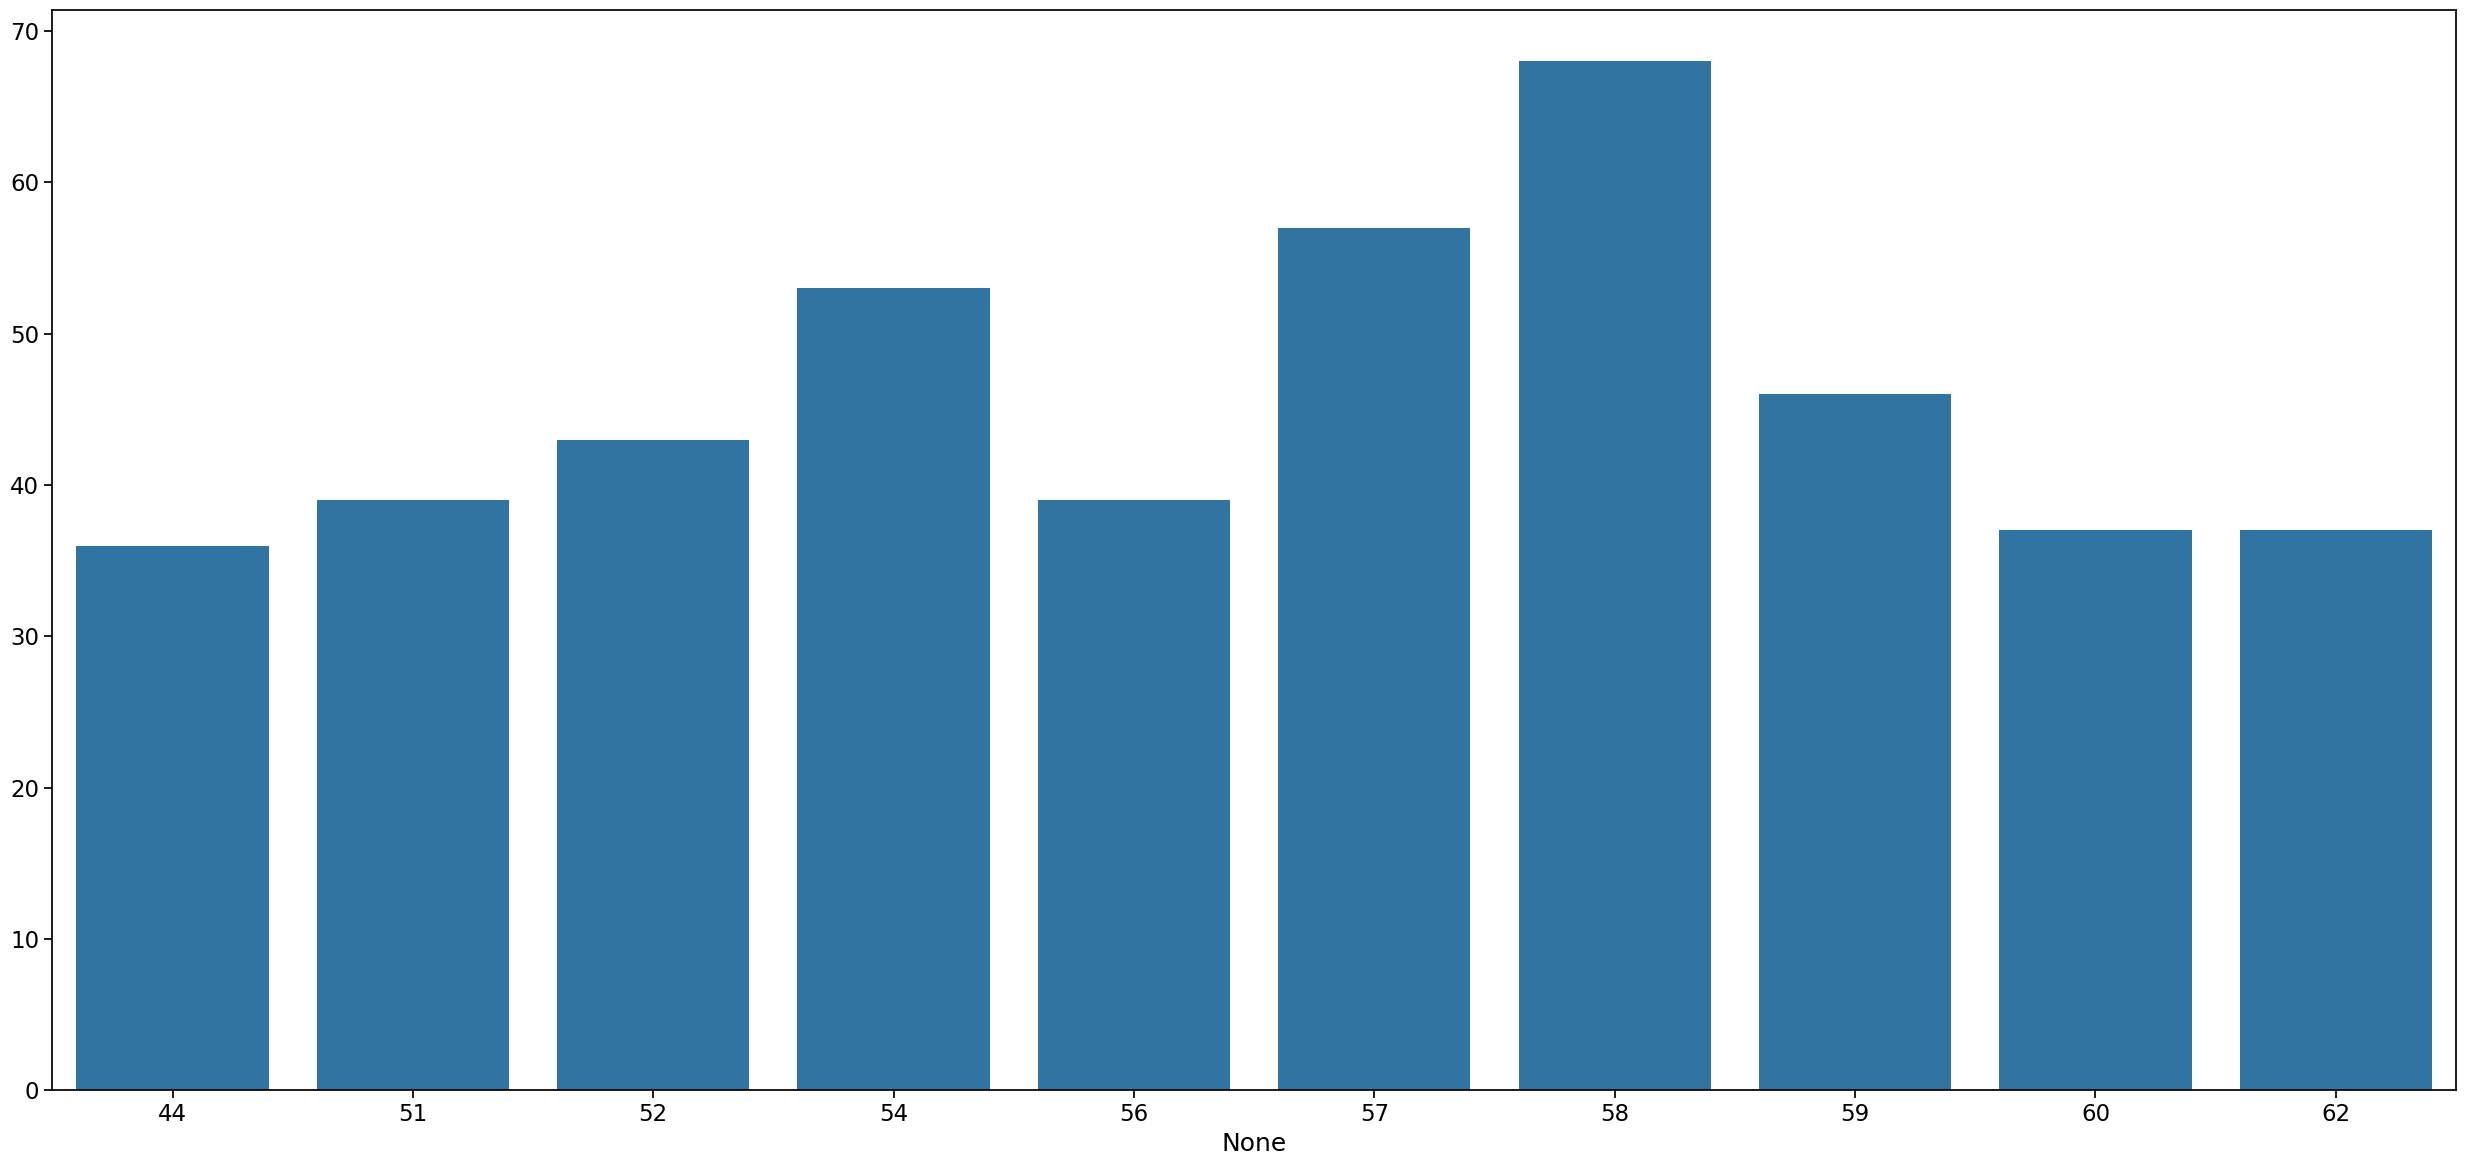

In [ ]:
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=heart.age.value_counts()[:10].index,y=heart.age.value_counts()[:10].values)
plt.tight_layout()

In [ ]:
minAge=min(heart.age)
maxAge=max(heart.age)
meanAge=heart.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.43414634146342


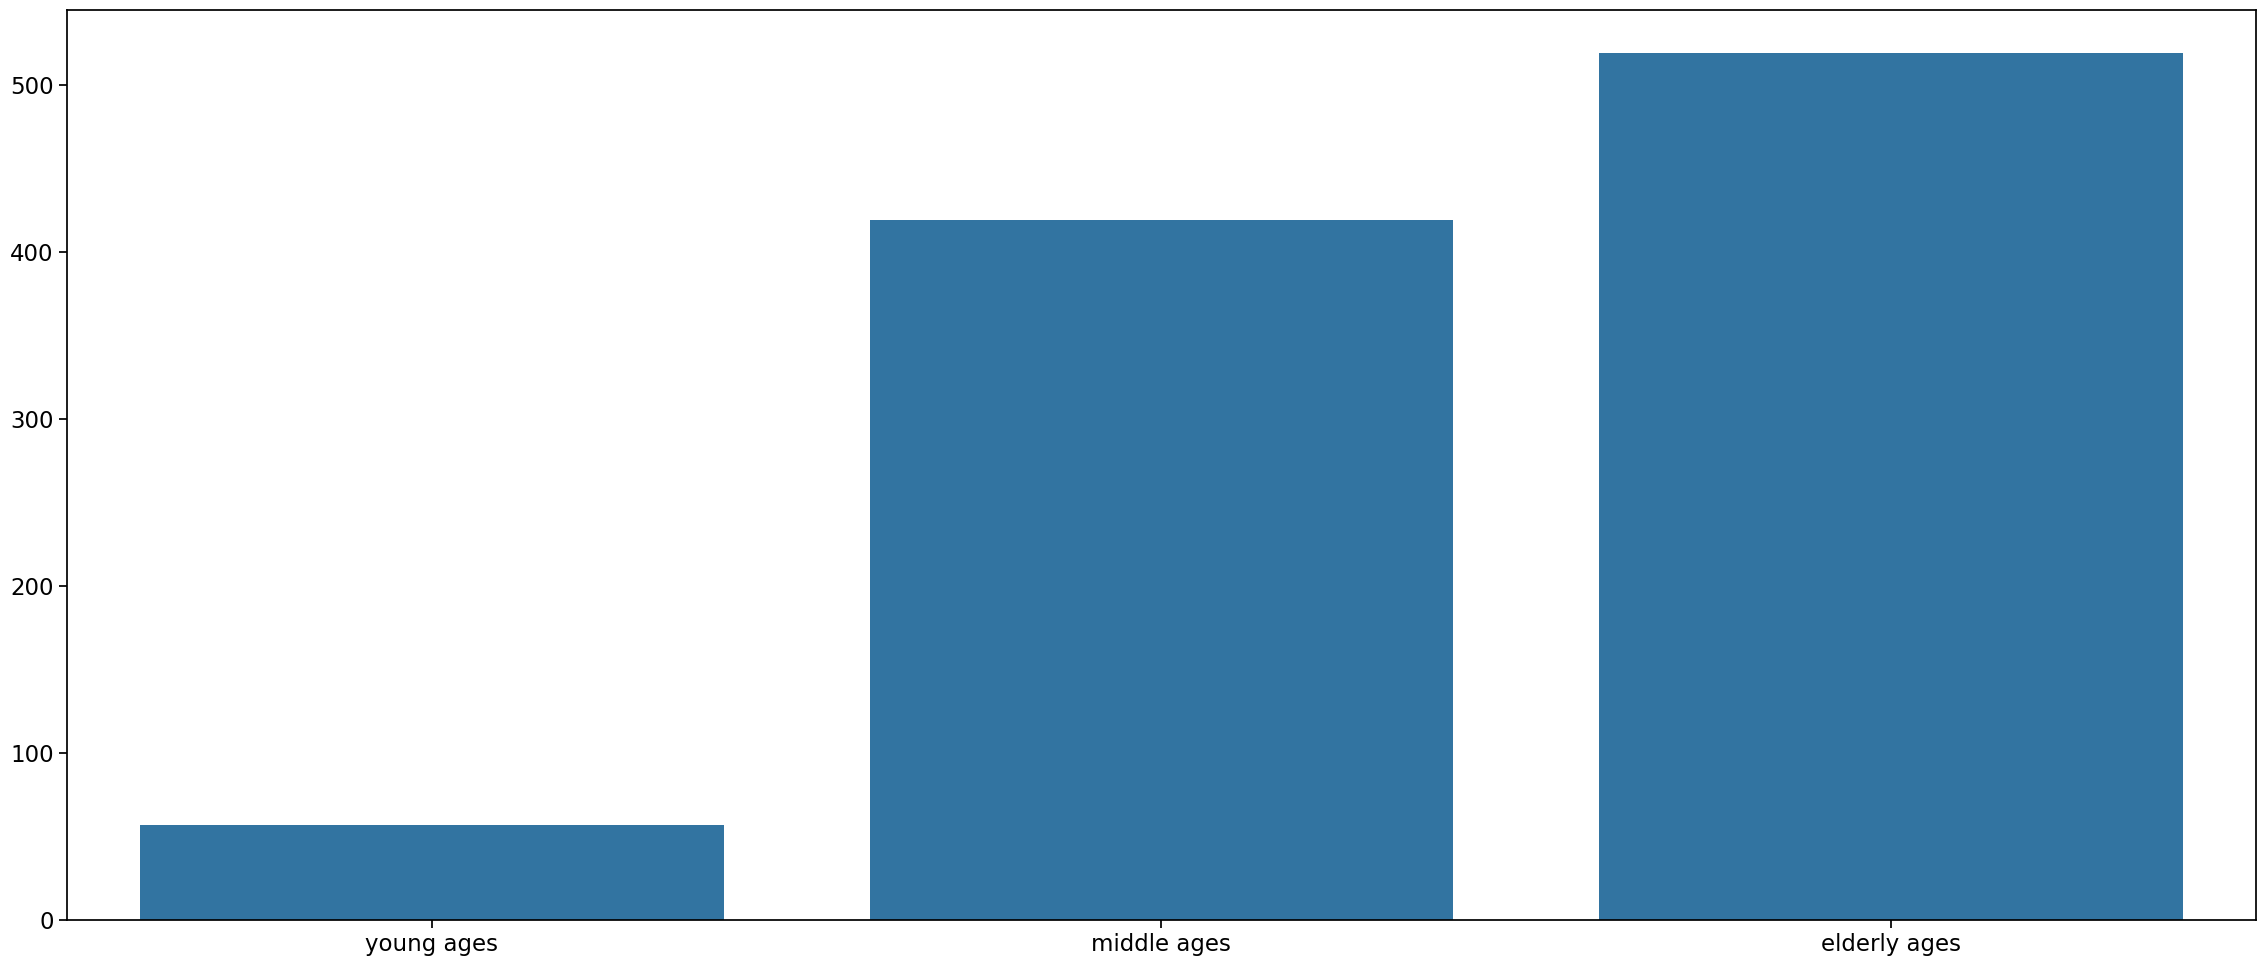

In [ ]:
Young = heart[(heart.age>=29)&(heart.age<40)]
Middle = heart[(heart.age>=40)&(heart.age<55)]
Elder = heart[(heart.age>55)]

plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

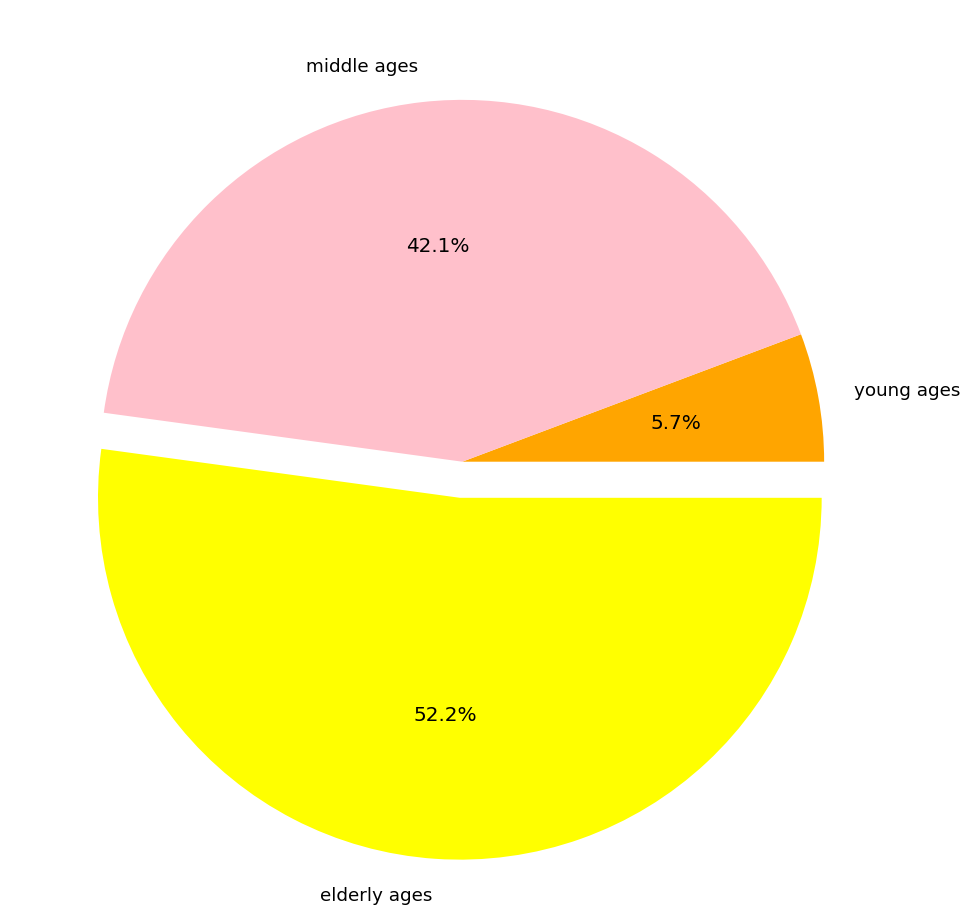

In [ ]:
colors = ['orange','pink','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

<Axes: >

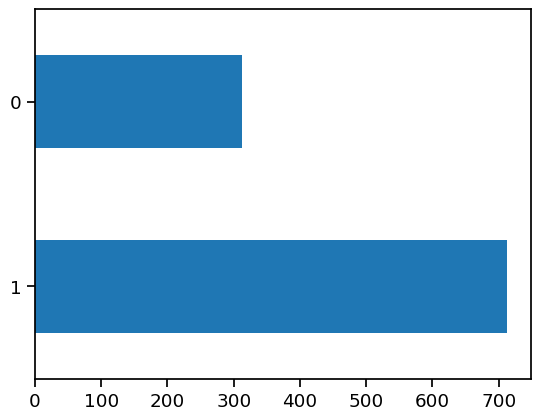

In [ ]:
heart['sex'].value_counts().plot(kind='barh')

<Axes: >

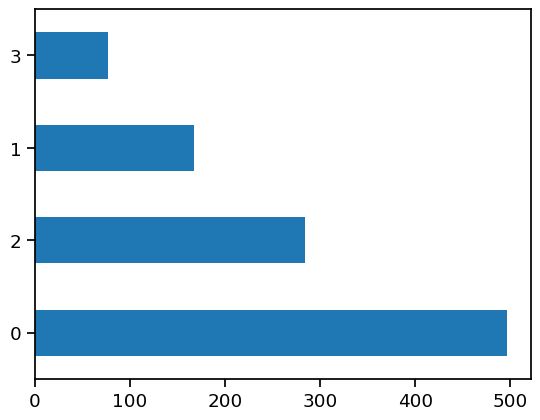

In [ ]:
heart['cp'].value_counts().plot(kind='barh')

<Axes: >

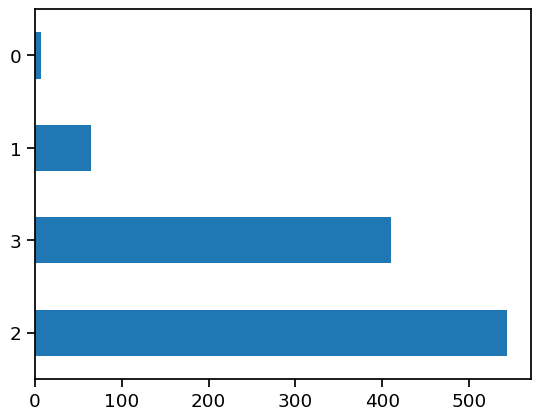

In [ ]:
heart['thal'].value_counts().plot(kind='barh')

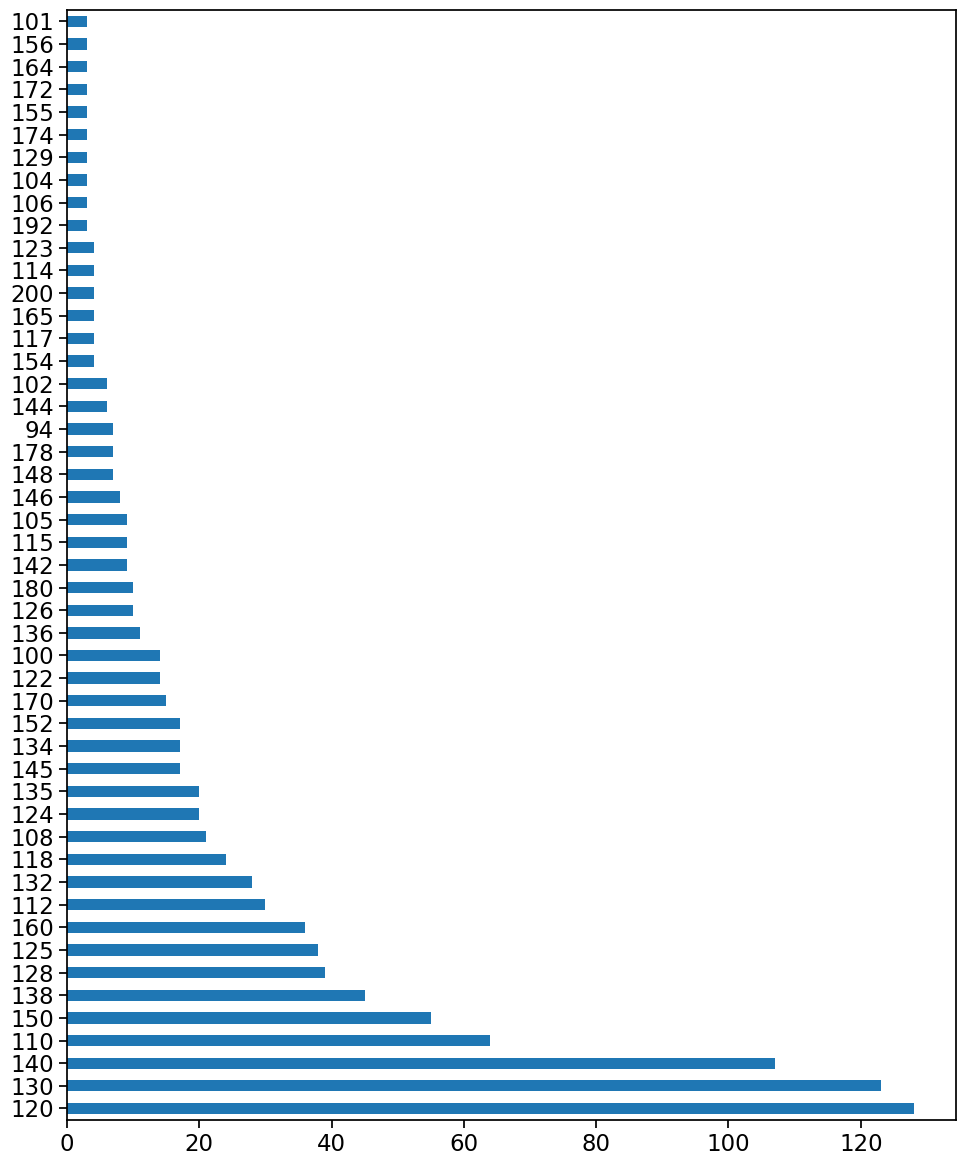

In [ ]:
plt.figure(figsize=(10,12))
sns.set_context('notebook',font_scale = 1.5)
heart['trestbps'].value_counts().plot(kind='barh')
plt.tight_layout()

In [ ]:
categorical_val = []
continous_val = []
for column in heart.columns:
    print("--------------------")
    print(f"{column} : {heart[column].unique()}")
    if len(heart[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

--------------------
age : [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
--------------------
sex : [1 0]
--------------------
cp : [0 1 2 3]
--------------------
trestbps : [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
--------------------
chol : [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 22

In [ ]:
categorical_val.remove('thal')
dfs = pd.get_dummies(heart, columns = categorical_val)
dfs.head(6)

,age,trestbps,chol,thalach,oldpeak,thal,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,target_0,target_1
0,52,125,212,168,1.0,3,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
1,53,140,203,155,3.1,3,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0
2,70,145,174,125,2.6,3,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0
3,61,148,203,161,0.0,3,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0
4,62,138,294,106,1.9,2,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
5,58,100,248,122,1.0,2,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dfs[col_to_scale] = sc.fit_transform(dfs[col_to_scale])
dfs.head(6)

,age,trestbps,chol,thalach,oldpeak,thal,sex_0,sex_1,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,target_0,target_1
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,3,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,3,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,3,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,3,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0
4,0.834359,0.364875,0.930822,-1.874977,0.705408,2,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
5,0.393241,-1.805540,0.038784,-1.179158,-0.060888,2,1,0,1,0,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
#splitting out dataset
X = dfs.drop('thal', axis=1)
y = dfs.thal

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)
print(accuracy_score(y_test,y_pred1))

0.7467532467532467
